In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path= r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 4\Data\Prepared Data'

In [7]:
ords_prods_merge=pd.read_pickle(os.path.join(path, 'ords_prods_flagged.pkl'),compression='infer' )

# 01. Visualizations 

<Axes: xlabel='orders_day_of_week'>

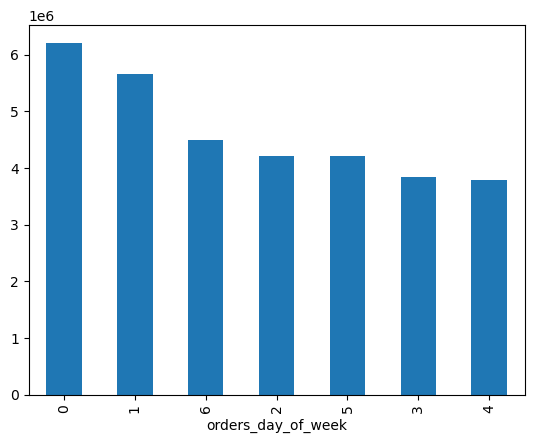

In [8]:
#creating a bar chart for categorical data
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

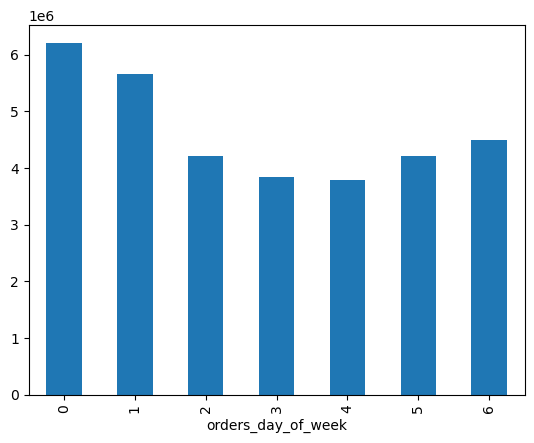

In [9]:
#putting the days of the week in order using the sort_index fxn
bar=ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

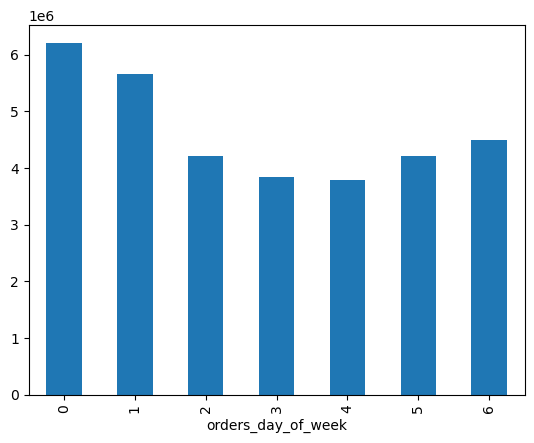

In [10]:
bar.figure

In [11]:
#exporting charts
newpath= r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 4'

In [13]:
bar.figure.savefig(os.path.join(newpath, 'Analysis', 'Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

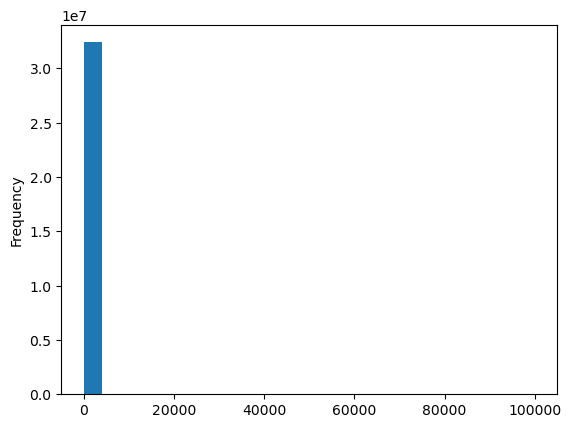

In [14]:
#creating histograms for continuous data
ords_prods_merge['prices'].plot.hist(bins=25)

In [15]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

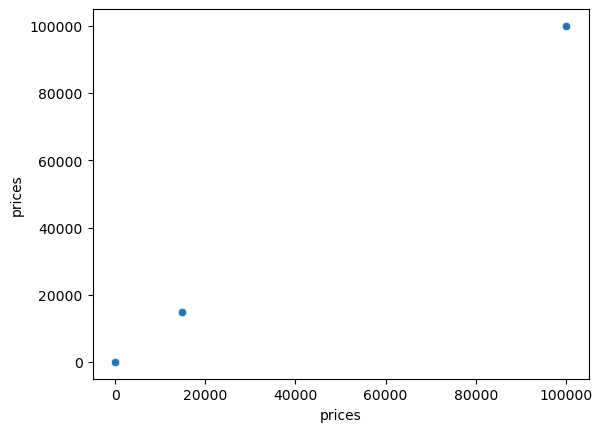

In [16]:
#creating a scatterplot
sns.scatterplot(x='prices', y='prices', data=ords_prods_merge)

In [17]:
#checking for outlier prices
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,busiest day,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,both,...,Regularly busy,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.00,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,both,...,Regularly busy,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.00,Frequent customer
16534,3264360,135,2,2,21,13.0,21553,6,0,both,...,Regularly busy,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.55,Regular customer
16540,892534,135,3,0,8,12.0,21553,3,1,both,...,Busiest day,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.55,Regular customer
53712,229704,342,8,1,19,30.0,21553,9,0,both,...,Regularly busy,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.00,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,3172853,205650,18,1,9,7.0,21553,17,1,both,...,Regularly busy,Regularly busy,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.00,Frequent customer
32377867,2504315,205818,3,5,15,3.0,21553,13,0,both,...,Regularly busy,Regularly busy,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,11.55,Regular customer
32377877,1108388,205818,5,4,5,1.0,21553,5,1,both,...,Least busy,Least busy,Slowest days,Fewest orders,25,Regular customer,170.073770,High spender,11.55,Regular customer
32410707,1916142,206049,1,2,17,11.1,21553,2,0,both,...,Regularly busy,Regularly busy,Regularly busy,Average orders,5,New customer,938.031250,High spender,11.10,Regular customer


In [18]:
#marking the outlier prices as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [19]:
ords_prods_merge['prices'].max()

25.0

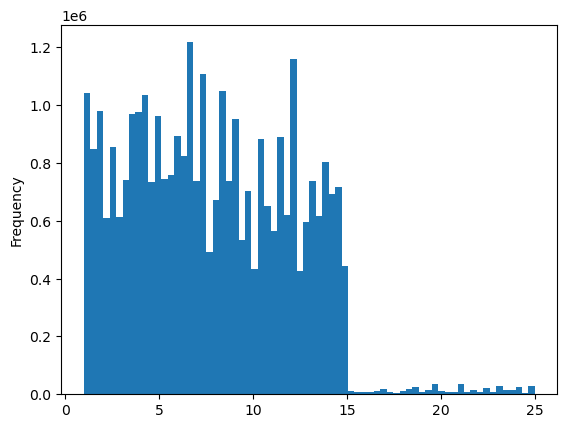

In [21]:
#replotting the histogram after removing the outliers
hist=ords_prods_merge['prices'].plot.hist(bins=70)

In [22]:
#exporting histogram
hist.figure.savefig(os.path.join(newpath, 'Analysis', 'Visualizations', 'hist_prices.png'))

In [24]:
#sampling data- when using the whole set takes up too much RAM
np.random.seed(4)
dev=np.random.rand(len(ords_prods_merge)) <= 0.7

In [25]:
#store 70% in the dataframe big
big=ords_prods_merge[dev]

In [26]:
#store 30% in the dataframe small
small=ords_prods_merge[~dev]

In [27]:
len(ords_prods_merge)

32435059

In [28]:
len(big) + len(small)

32435059

In [29]:
#speeding up processing time by reducing samples to only the necessary columns
df_2 = small[['orders_day_of_week','prices']]

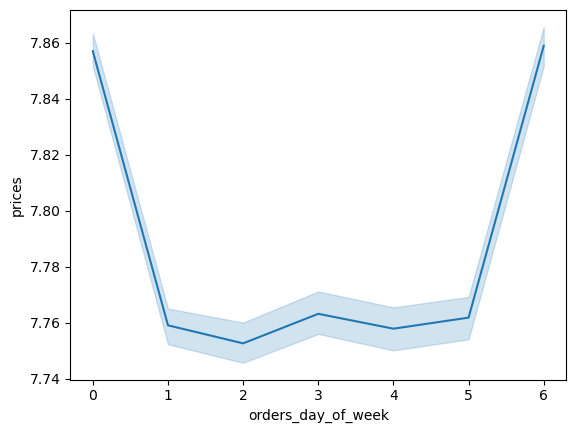

In [30]:
#creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [31]:
#exporting line graph
line.figure.savefig(os.path.join(newpath, 'Analysis', 'Visualizations', 'line_prices_orders_dow.png'))